# Capstone 1: Chess

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import chess
games = pd.read_csv('data/games.csv')

In [2]:
moves = games['moves']
match = moves.iloc[1]
match_list = np.array(match.split(' '))
match_array = match_list.reshape(-1,2)
rem_pieces = 32 - match.count('x')


In [3]:
def remaining_pieces(moves):
    '''
    Returns the number of pieces remaining on the board at the end of the match.
    Parameters
    ----------
    moves (string) = input move list

    Output
    ------
    number of remaining pieces (integer) 
    '''
    return 32 - moves.count('x')

In [4]:
def white_first_move(moves):
    '''
    Input the list of moves and output the first move white takes as a string
    '''
    moves = moves.split(' ')
    return moves[0]

In [5]:
def black_first_move(moves):
    '''
    Input the list of moves and output the first move black takes as a string
    '''
    moves = moves.split(' ')
    if len(moves) > 1:
        return moves[1]
    else:
        return None

In [6]:
games['rem_pieces']=games['moves'].apply(lambda x: remaining_pieces(x))

In [7]:
games['white_first_move'] = games['moves'].apply(lambda x: white_first_move(x))
games['black_first_move'] = games['moves'].apply(lambda x: black_first_move(x))
games

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,rem_pieces,white_first_move,black_first_move
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,29,d4,d5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,27,d4,Nc6
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,15,e4,e5
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,18,d4,d5
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,8,e4,e5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,28,d4,f5
20054,WSJDhbPl,True,1.499698e+12,1.499699e+12,82,mate,black,10+0,jamboger,1233,farrukhasomiddinov,1196,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn,2,11,d4,d6
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,28,d4,d5
20056,b0v4tRyF,True,1.499696e+12,1.499697e+12,109,resign,white,10+0,marcodisogno,1360,jamboger,1227,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense,4,7,e4,d6


In [8]:
games['eco_group'] = games['opening_eco'].apply(lambda x: x[0])

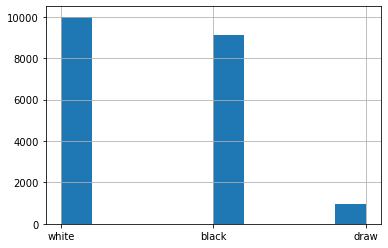

In [9]:
# scatter = games['turns','white_rating','black_rating','opening_ply']
# pd.plotting.scatter_matrix(scatter)
games['winner'].hist()

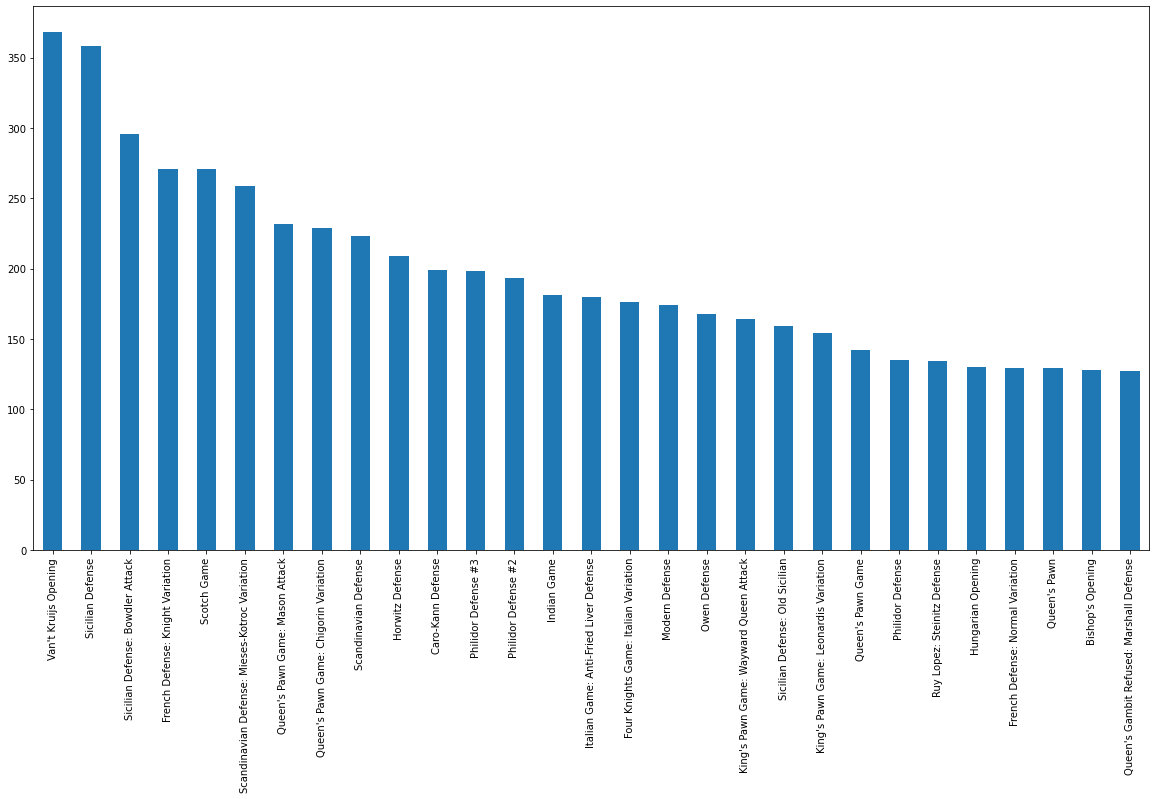

In [10]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_name'].value_counts()[:29].plot.bar()

In [11]:
openings = games['opening_name'].value_counts()
vant = games[games['opening_name'] == openings.keys()[0]]
sicilian = games[games['opening_name'] == openings.keys()[1]]
openings.keys()[0]
opening_df = games[games['opening_name'] == openings.keys()[0]]
bar_values = opening_df.groupby('winner').count()['id']
bar_values

winner
black    226
draw      16
white    126
Name: id, dtype: int64

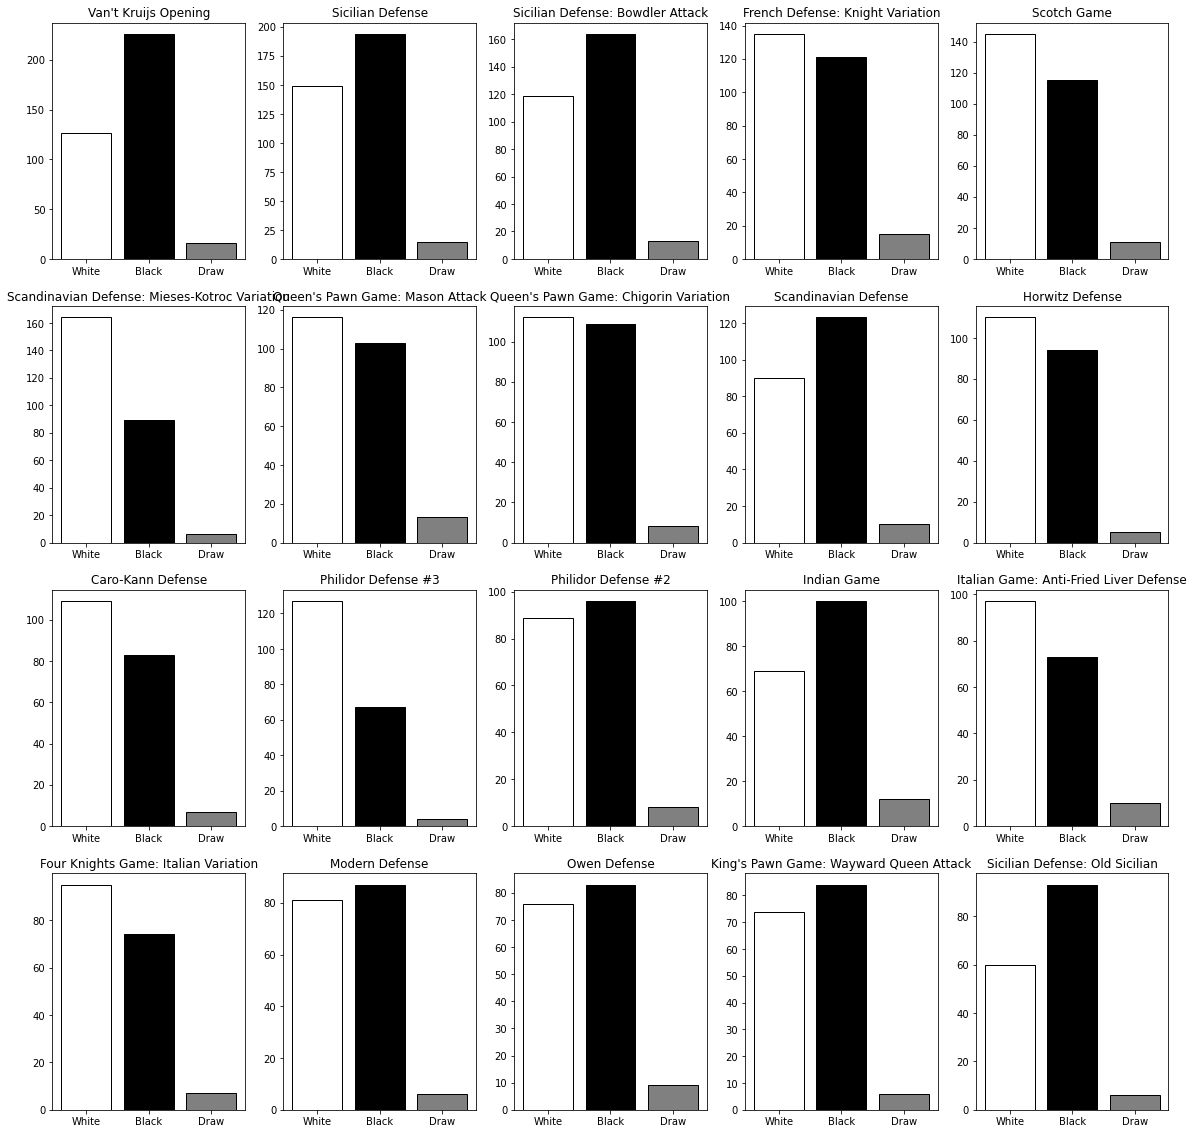

In [12]:
bins = ['white','black','draw']
fig, ax = plt.subplots(4,5,figsize=(20,20))
ax = ax.flatten()
for i in range(20):
    opening_df = games[games['opening_name'] == openings.keys()[i]]
    bar_values = opening_df.groupby('winner').count()['id']
    bar_values = bar_values.reindex(index = bins)
    ax[i].bar(bins, bar_values, color = ['w','k','gray'], edgecolor = 'k', tick_label = ['White','Black','Draw'])
    ax[i].set_title(openings.keys()[i])

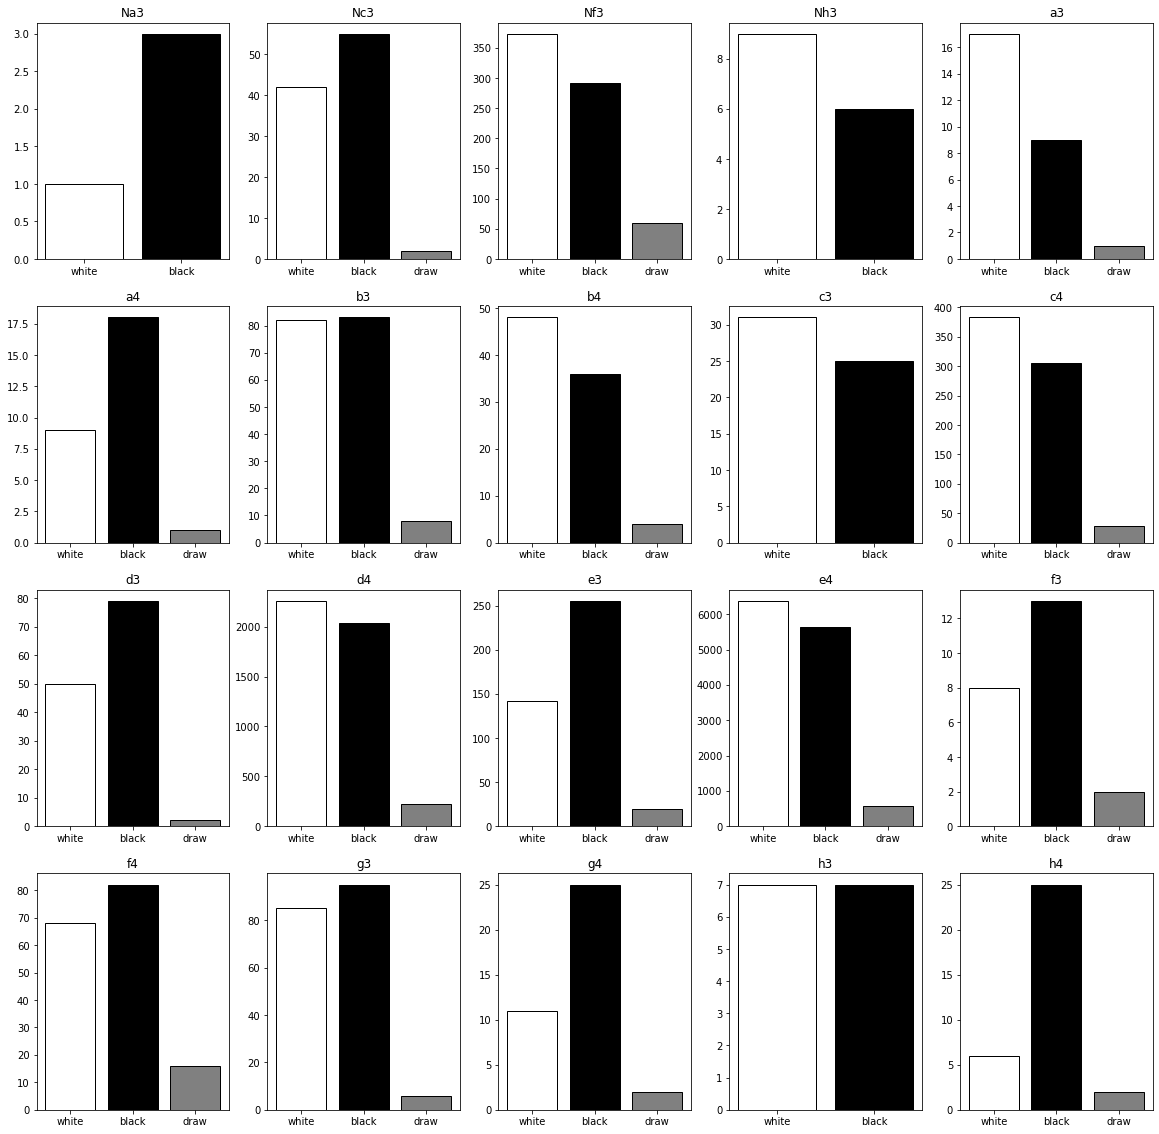

In [13]:
white_move = games.groupby('white_first_move')
# fig, ax = plt.subplots(4,5,figsize=(20,20))
white_move_groups = list(white_move.groups.keys())
fig, ax = plt.subplots(4,5,figsize=(20,20))
ax = ax.flatten()
for i in range(20):
    opening_df = games[games['white_first_move'] == white_move_groups[i]]
    bar_values = opening_df.groupby('winner').count()['id']
    bar_values = bar_values.reindex(index = bins)
    ax[i].bar(bins, bar_values, color = ['w','k','gray'], edgecolor = 'k')
    ax[i].set_title(white_move_groups[i])

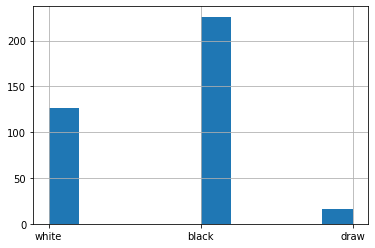

In [14]:
vant['winner'].hist()

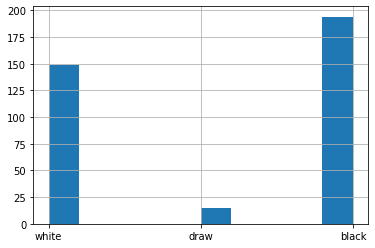

In [15]:
sicilian['winner'].hist()

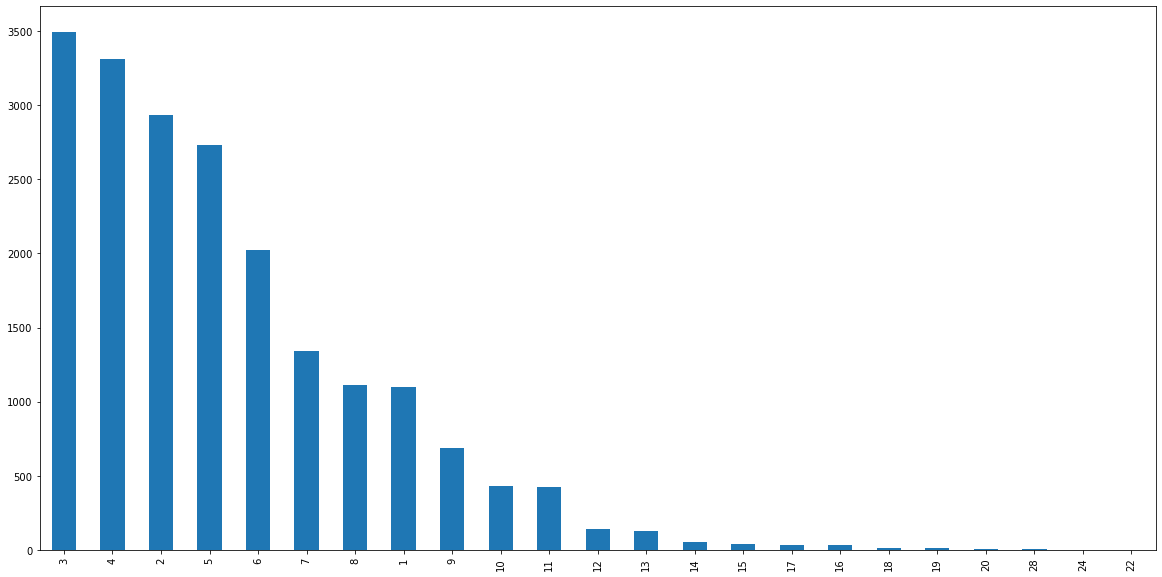

In [16]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_ply'].value_counts()[:29].plot.bar()

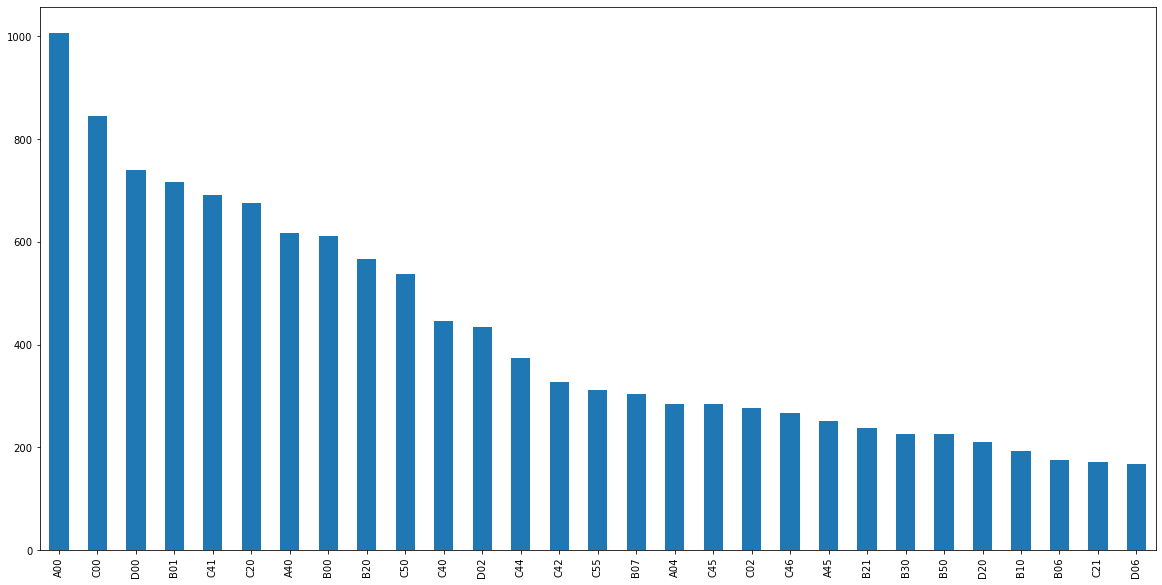

In [17]:
fig,ax = plt.subplots(figsize=(20,10))
ax = games['opening_eco'].value_counts()[:29].plot.bar()

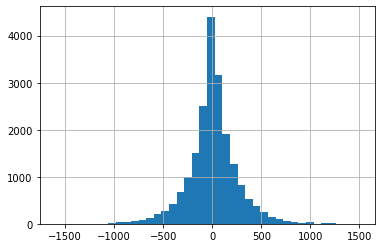

In [18]:
(games['white_rating']-games['black_rating']).hist(bins=40)

In [19]:
games['rating_differential']= games['white_rating']-games['black_rating']

In [20]:
games.groupby(['opening_name','winner']).count()

id  rated  created_at  last_move_at  \
opening_name                    winner                                        
Alekhine Defense                black   21     21          21            21   
                                draw     2      2           2             2   
                                white   23     23          23            23   
Alekhine Defense #2             black    1      1           1             1   
                                draw     1      1           1             1   
...                                     ..    ...         ...           ...   
Zukertort Opening: The Walrus   white    1      1           1             1   
Zukertort Opening: Vos Gambit   black    1      1           1             1   
                                draw     1      1           1             1   
                                white    1      1           1             1   
Zukertort Opening: Wade Defense black    1      1           1             1   

                                        turns  victory_status  increment_code  \
opening_name                    winner                                          
Alekhine Defense                black      21              21              21   
                                draw        2               2               2   
                                white      23              23              23   
Alekhine Defense #2             black       1               1               1   
                                draw        1               1               1   
...                                       ...             ...             ...   
Zukertort Opening: The Walrus   white       1               1               1   
Zukertort Opening: Vos Gambit   black       1               1               1   
                                draw        1               1               1   
                                white       1               1               1   
Zukertort Opening: Wade Defense black       1               1               1   

                                        white_id  white_rating  black_id  \
opening_name                    winner                                     
Alekhine Defense                black         21            21        21   
                                draw           2             2         2   
                                white         23            23        23   
Alekhine Defense #2             black          1             1         1   
                                draw           1             1         1   
...                                          ...           ...       ...   
Zukertort Opening: The Walrus   white          1             1         1   
Zukertort Opening: Vos Gambit   black          1             1         1   
                                draw           1             1         1   
                                white          1             1         1   
Zukertort Opening: Wade Defense black          1             1         1   

                                        black_rating  moves  opening_eco  \
opening_name                    winner                                     
Alekhine Defense                black             21     21           21   
                                draw               2      2            2   
                                white             23     23           23   
Alekhine Defense #2             black              1      1            1   
                                draw               1      1            1   
...                                              ...    ...          ...   
Zukertort Opening: The Walrus   white              1      1            1   
Zukertort Opening: Vos Gambit   black              1      1            1   
                                draw               1      1            1   
                                white              1      1            1   
Zukertort Opening: Wade Defense black              1     

In [21]:
draws = games[games['winner']=='draw']
draws[draws['rating_differential'] < 0].count()

id                     471
rated                  471
created_at             471
last_move_at           471
turns                  471
victory_status         471
winner                 471
increment_code         471
white_id               471
white_rating           471
black_id               471
black_rating           471
moves                  471
opening_eco            471
opening_name           471
opening_ply            471
rem_pieces             471
white_first_move       471
black_first_move       471
eco_group              471
rating_differential    471
dtype: int64

In [22]:
draws[draws['rating_differential'] == 0].count()

id                     13
rated                  13
created_at             13
last_move_at           13
turns                  13
victory_status         13
winner                 13
increment_code         13
white_id               13
white_rating           13
black_id               13
black_rating           13
moves                  13
opening_eco            13
opening_name           13
opening_ply            13
rem_pieces             13
white_first_move       13
black_first_move       13
eco_group              13
rating_differential    13
dtype: int64

In [23]:
openings_grp = games.groupby('opening_name')

In [24]:
ratings = games[['white_rating','black_rating','winner']]
ratings['diff'] = ratings['white_rating']-ratings['black_rating']

# for i in ratings.index:
#     if ratings['diff'].iloc[i] > 0 and ratings['winner'].iloc[i] == 'white':
#         ratings['upset'].iloc[i] = 'expected'
#     elif ratings['winner'].iloc[i] == 'draw':
#         ratings['upset'].iloc[i] = 'unknown'
#     elif ratings['diff'].iloc[i] < 0 and ratings.iloc[i]['winner'] == 'black':
#         ratings['upset'].iloc[i] = 'expected'
#     else:
#         ratings['upset'].iloc[i] = 'upset'
# ratings['upset'].hist()

ratings['expected_winner'] = np.where(ratings['white_rating'] >= ratings['black_rating'],'white','black')
games['expected_winner'] = np.where(games['white_rating'] >= games['black_rating'],'white','black')
ratings['upset'] = np.where(ratings['winner']==ratings['expected_winner'],'expected','upset')
games['upset'] = np.where(games['winner']==games['expected_winner'],'expected','upset')

for i in ratings.index:
    if ratings['winner'].iloc[i] == 'draw':
        ratings['upset'].iloc[i] = 'draw'

for i in games.index:
    if games['winner'].iloc[i] == 'draw':
        games['upset'].iloc[i] = 'draw'

/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/jules/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

expected    12447
upset        6661
draw          950
Name: upset, dtype: int64

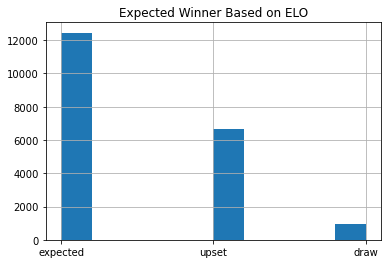

In [25]:
ratings['upset'].hist()
plt.title('Expected Winner Based on ELO')
ratings['upset'].value_counts()

In [26]:
upsets = ratings['upset'].value_counts()

In [27]:
raw = ratings['upset'].value_counts().values
raw/raw.sum()

array([0.6205504 , 0.33208695, 0.04736265])

In [28]:
pd.array

<function pandas.core.construction.array(data: Sequence[object], dtype: Union[str, numpy.dtype, pandas.core.dtypes.base.ExtensionDtype, NoneType] = None, copy: bool = True) -> pandas.core.dtypes.generic.ABCExtensionArray>

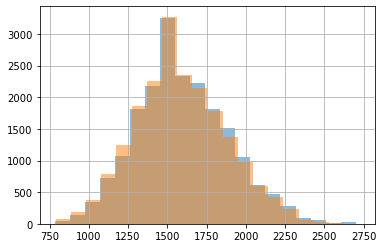

In [29]:
games['white_rating'].hist(bins=20,alpha=0.5)
games['black_rating'].hist(bins=20,alpha=0.5)

In [30]:
rating_arr = games['white_rating'].to_numpy()

In [31]:
rating_arr = np.append(rating_arr,games['black_rating'].to_numpy())

(array([1.140e+02, 2.940e+02, 7.480e+02, 1.515e+03, 2.371e+03, 3.702e+03,
        4.480e+03, 6.552e+03, 4.684e+03, 4.402e+03, 3.587e+03, 2.845e+03,
        1.994e+03, 1.170e+03, 8.890e+02, 4.820e+02, 1.480e+02, 8.400e+01,
        5.300e+01, 2.000e+00]),
 array([ 784.  ,  880.95,  977.9 , 1074.85, 1171.8 , 1268.75, 1365.7 ,
        1462.65, 1559.6 , 1656.55, 1753.5 , 1850.45, 1947.4 , 2044.35,
        2141.3 , 2238.25, 2335.2 , 2432.15, 2529.1 , 2626.05, 2723.  ]),
 <a list of 20 Patch objects>)

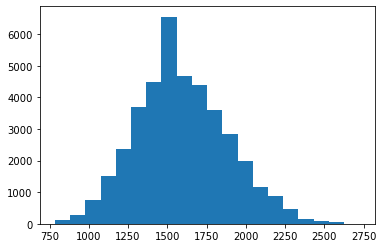

In [32]:
plt.hist(rating_arr,bins=20)

In [33]:
bins = np.arange(750,2750,250)

In [34]:
high_elo_w = games[games['white_rating'] >= 2500]
high_elo_w['white_id'].unique()

array(['lance5500', 'lexisvar', 'shahoviy_komentator', 'blitzbullet',
       'king-bullet', 'le_truand', 'chess-stat', 'justicebot',
       'teatime007', 'chesspirate421'], dtype=object)

In [35]:
high_elo_b = games[games['black_rating'] >= 2500]
high_elo = pd.concat([high_elo_b,high_elo_w])
high_elo

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,opening_eco,opening_name,opening_ply,rem_pieces,white_first_move,black_first_move,eco_group,rating_differential,expected_winner,upset
4473,rAO6oybn,False,1.480830e+12,1.480830e+12,1,outoftime,white,5+5,ranchowangdu,1500,...,B00,King's Pawn,1,32,e4,None,B,-1223,black,upset
4797,83vhI5GR,False,1.470150e+12,1.470160e+12,33,resign,black,60+60,nomadre,1884,...,B78,Sicilian Defense: Dragon Variation | Yugoslav...,19,26,e4,c5,B,-616,black,expected
5373,zkk33R0Z,False,1.496890e+12,1.496890e+12,40,mate,black,15+0,burks,1016,...,A00,Van Geet Opening,1,21,Nc3,c5,A,-1605,black,expected
5374,5gtNuMhB,False,1.496880e+12,1.496880e+12,48,mate,black,10+0,burks,1016,...,A48,Torre Attack,5,20,Nf3,Nf6,A,-1605,black,expected
5671,jvx4GoJV,True,1.503060e+12,1.503060e+12,122,outoftime,black,15+0,justlikemusic,2145,...,E64,King's Indian Defense: Fianchetto Variation | ...,12,12,d4,Nf6,E,-443,black,expected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16621,8WxfSxC9,False,1.503611e+12,1.503614e+12,107,resign,white,20+10,chesspirate421,2500,...,B40,Sicilian Defense: French Variation,4,14,e4,c5,B,295,white,expected
16641,ttaaZI0J,False,1.482910e+12,1.482910e+12,79,resign,white,8+0,lance5500,2613,...,D53,Queen's Gambit Declined: 4.Bg5 Be7,8,10,d4,e6,D,709,white,expected
18328,JVV78yDG,False,1.500555e+12,1.500556e+12,29,outoftime,white,10+25,lance5500,2621,...,B15,Caro-Kann Defense: Tartakower Variation,10,23,e4,c6,B,1066,white,expected
19016,upN6B2c0,False,1.503525e+12,1.503527e+12,69,resign,white,10+15,lance5500,2621,...,B90,Sicilian Defense: Najdorf | Lipnitsky Attack,11,14,e4,c5,B,415,white,expected


In [36]:
games.sort_values(by='opening_ply',ascending=False)

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,opening_eco,opening_name,opening_ply,rem_pieces,white_first_move,black_first_move,eco_group,rating_differential,expected_winner,upset
4475,9bIIqx54,False,1.480830e+12,1.480840e+12,32,outoftime,black,5+5,ranchowangdu,1500,...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,25,e4,e5,C,-521,black,expected
19412,YaQWFwbu,True,1.502744e+12,1.502745e+12,61,resign,white,10+0,balikoevsd,1857,...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,18,e4,e5,C,-59,black,upset
17900,Ms2THNEC,True,1.504184e+12,1.504184e+12,45,resign,black,3+8,bratancb,2000,...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,22,e4,e5,C,-289,black,expected
16443,BjplwwJ1,True,1.481225e+12,1.481226e+12,34,resign,black,10+0,ramin741,1835,...,C89,Ruy Lopez: Marshall Attack | Modern Main Line,28,26,e4,e5,C,102,white,upset
18853,58AwByNw,True,1.475188e+12,1.475189e+12,65,outoftime,white,10+5,teddster,2168,...,B19,Caro-Kann Defense: Classical Variation | Lobr...,24,19,e4,c6,B,118,white,expected
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,xnm3oh0t,True,1.487460e+12,1.487460e+12,76,resign,white,11+0,alexandre_silva,1477,...,A00,Van't Kruijs Opening,1,14,e3,e5,A,-83,black,upset
3094,HIZAAqDg,True,1.487460e+12,1.487460e+12,61,resign,white,11+0,alexandre_silva,1472,...,A00,Mieses Opening,1,16,d3,d5,A,-92,black,upset
3096,XViv0SVq,True,1.504160e+12,1.504160e+12,59,outoftime,white,5+5,alichess68,1567,...,A00,Hungarian Opening,1,15,g3,b6,A,459,white,expected
3099,A6wCNlRk,True,1.503870e+12,1.503870e+12,163,mate,white,6+5,alichess68,1616,...,A00,Hungarian Opening,1,4,g3,e6,A,212,white,expected


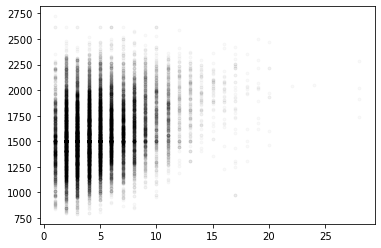

In [37]:
turns = games.sort_values(by='turns')
plt.scatter(turns['opening_ply'],turns['black_rating'],color='k',alpha=0.025,marker='.')

In [38]:
def plot_ply(df, ax):
    plies = df.groupby('opening_ply').mean()[['white_rating','black_rating']]
    ax.plot(plies.index,plies[['white_rating','black_rating']])

In [39]:
plies = games.groupby('opening_ply').mean()[['white_rating','black_rating']]

In [99]:
games[games['turns']==2]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,...,rem_pieces,white_first_move,black_first_move,eco_group,rating_differential,expected_winner,upset,average_rating,rating_diff_abs,elo_range
141,X4QqWp8Q,True,1.503130e+12,1.503130e+12,2,resign,black,15+15,pune123,1443,...,32,e4,Nf6,B,239,white,upset,1323.5,239,"(1100, 1400]"
439,37DIkyQP,True,1.501820e+12,1.501820e+12,2,draw,draw,10+0,marianocharly,1641,...,32,e4,d5,B,139,white,draw,1571.5,139,"(1400, 1700]"
460,QYc8zif6,True,1.503080e+12,1.503080e+12,2,outoftime,black,5+5,fischerdipper,1646,...,32,d4,d5,D,-149,black,expected,1720.5,149,"(1700, 2000]"
1814,2CKxscOK,False,1.493340e+12,1.493350e+12,2,outoftime,black,15+0,lkasperbauer,1038,...,32,e4,d5,B,-293,black,expected,1184.5,293,"(1100, 1400]"
1956,XJ9s4FNH,True,1.489290e+12,1.489290e+12,2,outoftime,black,10+0,brorael357,1336,...,32,e4,d5,B,-180,black,expected,1426.0,180,"(1400, 1700]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19112,HehthdTm,True,1.502909e+12,1.502909e+12,2,resign,white,8+0,dino69,1834,...,32,e4,e6,C,125,white,expected,1771.5,125,"(1700, 2000]"
19118,iI0Fcm9f,False,1.504043e+12,1.504043e+12,2,resign,white,60+180,thebadfish,1963,...,32,b4,f5,A,82,white,expected,1922.0,82,"(1700, 2000]"
19128,51wccHT4,False,1.503779e+12,1.503779e+12,2,resign,black,45+45,thebadfish,1973,...,32,c4,f5,A,92,white,upset,1927.0,92,"(1700, 2000]"
19236,Mynfr537,False,1.504437e+12,1.504437e+12,2,resign,white,45+0,ziaad98,1500,...,32,e4,c5,B,267,white,expected,1366.5,267,"(1100, 1400]"


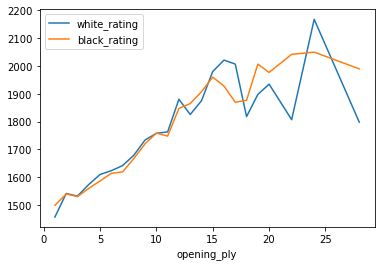

In [41]:
plies.plot()

In [42]:
ply = []
groups = ['A','B','C','D','E']
for i in range(5):
    ply.append(games[games['eco_group'] == groups[i]])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


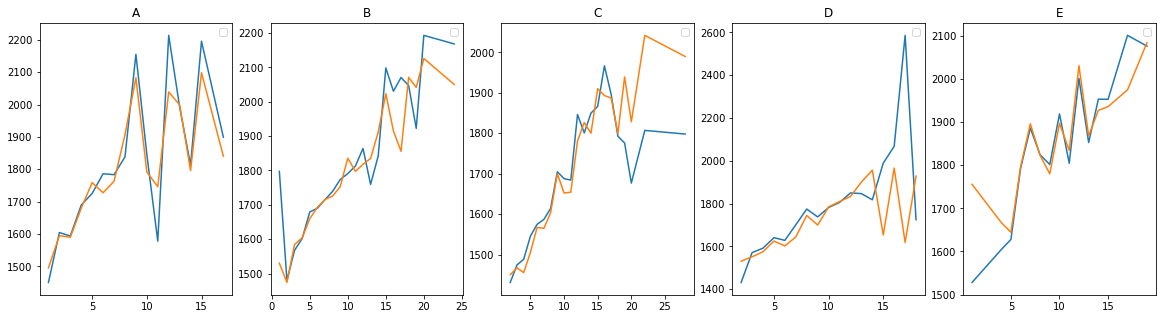

In [43]:
# Switch axes possibly possibly explain trend
fig, ax = plt.subplots(1,5,figsize=(20,5))
for i in range(5):
    plot_ply(ply[i], ax[i])
    ax[i].set_title(groups[i])
    ax[i].legend()


In [44]:
rated = games[games['rated']==True]
unrated = games[games['rated']==False]
users = games['white_id'].value_counts()[games['white_id'].value_counts()>1].keys()

In [45]:
games['average_rating'] = (games['white_rating']+games['black_rating'])/2

In [46]:
games['rating_diff_abs'] = games['rating_differential'].apply(lambda x: abs(x))

In [102]:
# Sort games dataframe into sections based on ELO in range(750,2750,250)
games['elo_range'] = pd.cut(games['average_rating'],[800,1200,1600,2000,2500])
elo_groups = games.groupby('elo_range')
elo_group_names = elo_groups.groups
elo_keys = list(elo_group_names.keys())
elo_dfs = []
for i in range(len(elo_keys)):
    elo_dfs.append(elo_groups.get_group(elo_keys[i]))

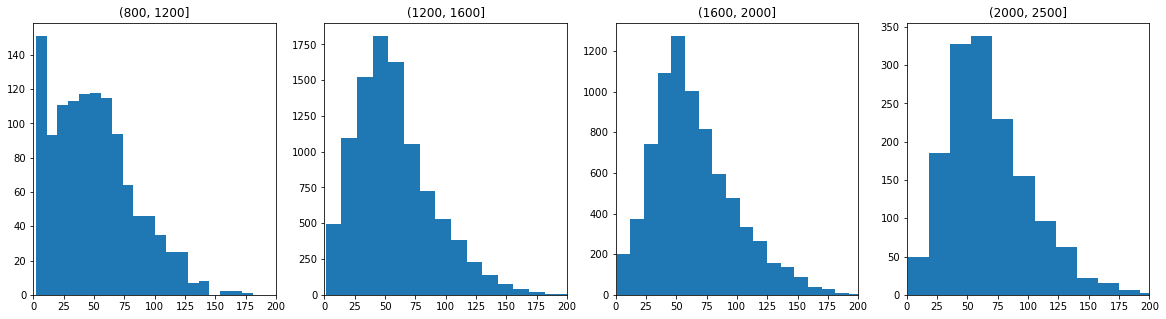

In [103]:
# compare length of games and opening ply across elo ranges
fig, ax = plt.subplots(1,4, figsize = (20,5))
ax = ax.flatten()
for i in range(len(elo_dfs)):
    elo_range = elo_dfs[i]
    ax[i].hist(elo_range['turns'],bins=20)
    ax[i].set_title(elo_keys[i])
    ax[i].set_xlim(0,200)

In [57]:
# for i in range(len(elo_dfs)):
#     elo_range = elo_dfs[i]
#     expected = elo_range[elo_range['upset'] == 'expected']
#     upset = elo_range[elo_range['upset'] == 'upset']
#     draw = elo_range[elo_range['upset'] == 'draw']
#     print(f'{elo_keys[i]}:\nMean = {expected["rating_differential"].mean()}\nStd = {expected["rating_differential"].std()}\n')

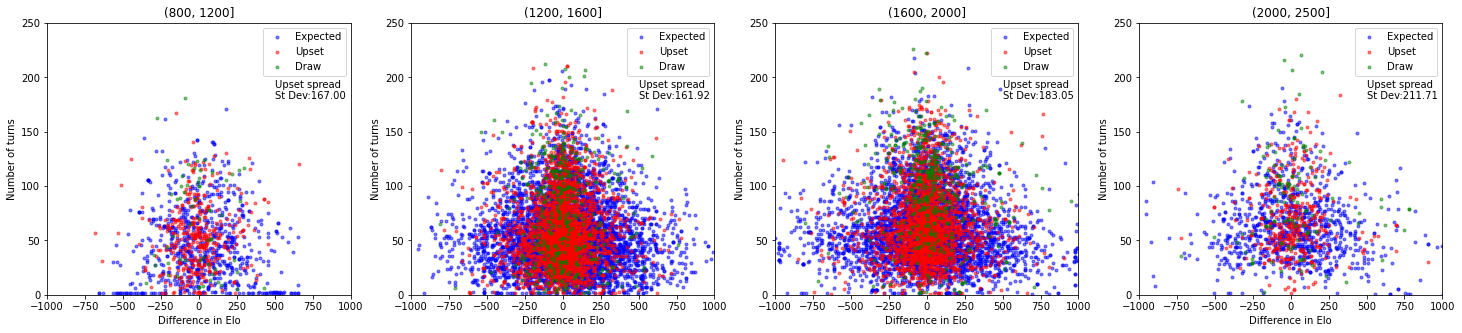

In [107]:
fig, ax = plt.subplots(1,4, figsize = (25,5))
ax = ax.flatten()
for i in range(len(elo_dfs)):
    elo_range = elo_dfs[i]
    expected = elo_range[elo_range['upset'] == 'expected']
    upset = elo_range[elo_range['upset'] == 'upset']
    draw = elo_range[elo_range['upset'] == 'draw']
    upset_data = [upset['rating_differential'].mean(),upset['rating_differential'].std()]
    ax[i].scatter(expected['rating_differential'],expected['turns'],marker='.', color = 'b', alpha = 0.5)
    ax[i].scatter(upset['rating_differential'],upset['turns'],marker='.', color = 'r', alpha = 0.5)
    ax[i].scatter(draw['rating_differential'],draw['turns'],marker='.', color = 'g', alpha = 0.5)
    ax[i].set_xlabel('Difference in Elo')
    ax[i].set_ylabel('Number of turns')
    ax[i].set_xlim(-1000,1000)
    ax[i].set_ylim(0,250)
    ax[i].set_title(elo_keys[i])
    ax[i].text(500,180,f'Upset spread\nSt Dev:{upset_data[1]:.2f}')
    ax[i].legend(['Expected','Upset','Draw'])
plt.savefig('img/upset_spread')

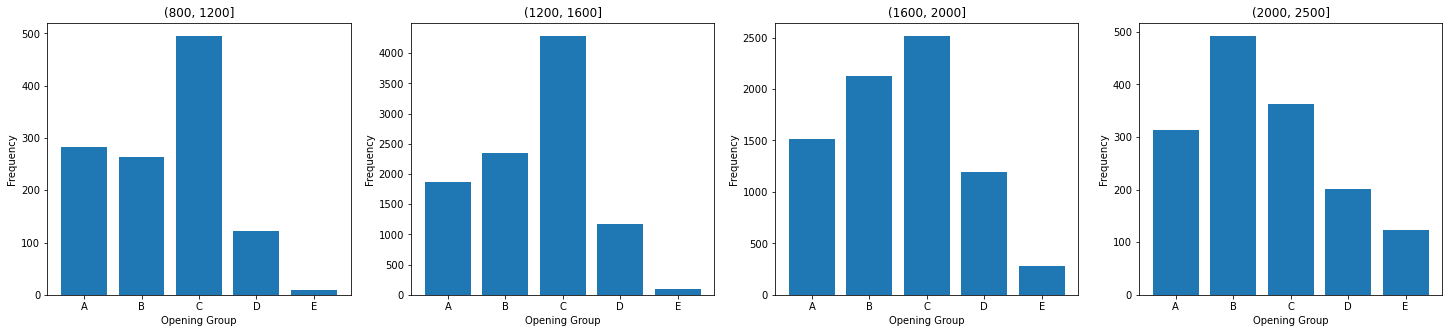

In [106]:
fig, ax = plt.subplots(1,4, figsize = (25,5))
ax = ax.flatten()
for i in range(len(elo_dfs)):
    counts = elo_dfs[i]['eco_group'].value_counts().sort_index()
    ax[i].bar(counts.index,counts.values)
    ax[i].set_xlabel('Opening Group')
    ax[i].set_ylabel('Frequency')
    ax[i].set_title(elo_keys[i])
plt.savefig('img/opening_strategy')

In [52]:
X = games['turns'].values.reshape(-1,1)
Y = games['rem_pieces'].values.reshape(-1,1)
fit = LinearRegression().fit(X,Y)
fit.predict(X)

array([[26.97981308],
       [26.3899074 ],
       [17.54132217],
       ...,
       [22.65383808],
       [ 8.10283126],
       [14.1985233 ]])

In [53]:
len(elo_range)

11

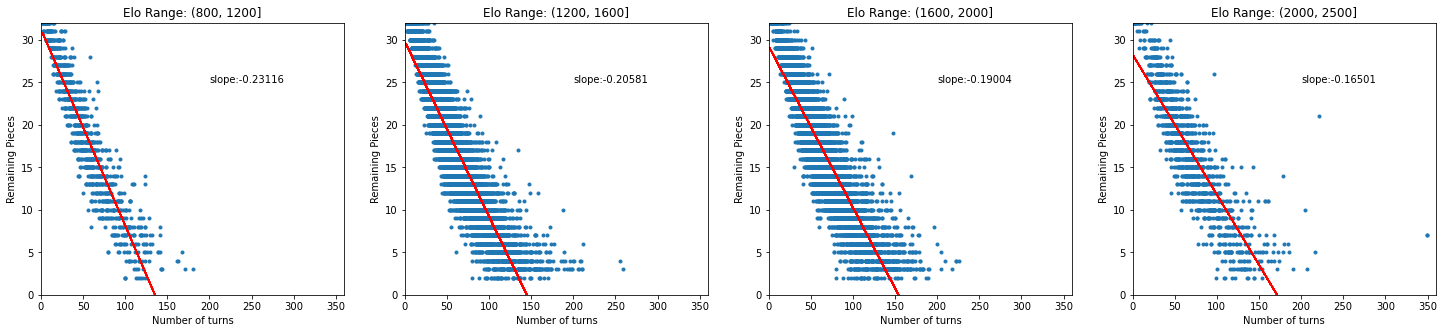

In [109]:
fig, ax = plt.subplots(1,4, figsize=(25,5))
ax = ax.flatten()
for i in range(len(elo_dfs)):
    elo_range = elo_dfs[i]
    length = len(elo_range)
    X = elo_range['turns'].values.reshape(-1,1)
    Y = elo_range['rem_pieces']
    fit = LinearRegression().fit(X,Y)
    slope = fit.coef_
    intercept = fit.intercept_
    ax[i].text(200,25,f'slope:{float(slope):.5f}')
    ax[i].scatter(elo_range['turns'],elo_range['rem_pieces'], marker = '.')
    ax[i].plot(X,fit.predict(X), color='r')
    ax[i].set_xlim(0,360)
    ax[i].set_ylim(0, 32)
    ax[i].set_xlabel('Number of turns')
    ax[i].set_ylabel('Remaining Pieces')
    ax[i].set_title(f'Elo Range: {elo_keys[i]}')
plt.savefig('img/speed_of_game')

In [55]:
fit.

SyntaxError: invalid syntax (<ipython-input-55-227f6453c3bc>, line 1)

In [ ]:
board =chess.Board()
moves = games['moves'][2].split(' ')
for i in range(len(moves)):
    board.push_san(moves[i])
last_move = board.pop()
# board.piece_at(last_move)
board

In [ ]:
pd.to_datetime(games['created_at'], unit='ms').min()

In [ ]:
pd.to_datetime(games['created_at'], unit='ms').max()

In [ ]:
games[games['white_first_move']=='a4']